In [1]:
import japanize_matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from life_plan_manager.life_plan_simulate import LifePlanSimulate
from asset_manager.asset_management_simulate import AssetManagementSimulate

### 1. 生活のシミュレーション
#https://media.rakuten-sec.net/articles/-/35499?page=2#:~:text=S%26P500%E6%8C%87%E6%95%B0%EF%BC%88%E5%86%86%EF%BC%89%E3%81%AE%E3%83%AA%E3%82%BF%E3%83%BC%E3%83%B3,%E6%A8%99%E6%BA%96%E5%81%8F%E5%B7%AE%EF%BC%89%E3%81%AF18.1%EF%BC%85%E3%80%82

In [2]:
life_plan_dict = {}

In [3]:
pension_amount = int(input("月の年金額"))
life_plan_dict['pension_amount'] = pension_amount * 12
print(f'月の年金額 : {pension_amount:,}円')

月の年金額 : 130,000円


In [4]:
cost_of_living = int(input("生活費"))
life_plan_dict['cost_of_living'] = cost_of_living * 12
print(f'月の生活費 : {cost_of_living:,}円')

月の生活費 : 200,000円


In [5]:
severance_pay = int(input("退職金"))
life_plan_dict['severance_pay'] = severance_pay
print(f'退職金 : {severance_pay:,}円')

退職金 : 20,000,000円


In [6]:
current_saving = int(input("貯金"))
life_plan_dict['current_saving'] = current_saving
print(f'貯金 : {current_saving:,}円')

貯金 : 3,000,000円


In [7]:
simulate_age = int(input("シミュレーション年齢"))
life_plan_dict['simulate_age'] = simulate_age
print(f'シミュレーション年齢 : {simulate_age:,}歳')

シミュレーション年齢 : 100歳


In [8]:
car_purchase_frequency = int(input("車の買い替え頻度"))
life_plan_dict['car_purchase_frequency'] = car_purchase_frequency
print(f'車の買い替え頻度 : {car_purchase_frequency:,}年')

車の買い替え頻度 : 10年


In [9]:
car_price = int(input("車の値段"))
life_plan_dict['car_price'] = car_price
print(f'車の値段 : {car_price:,}円')

車の値段 : 2,000,000円


In [3]:
print(life_plan_dict)

{}


In [3]:
life_plan_dict = {'pension_amount': 1560000, 'cost_of_living': 2400000, 'severance_pay': 20000000, 'current_saving': 3000000, 'simulate_age': 100, 'car_purchase_frequency': 10, 'car_price': 2000000}

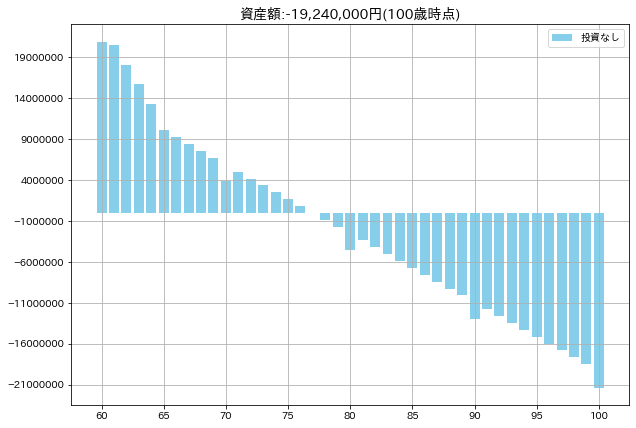

In [4]:
life_plan_simulate = LifePlanSimulate(**life_plan_dict)
life_plan_simulate.plot_life_plan_simulate_without_asset_management()

### 2.資産運用シミュレーション(確率分布)

In [6]:
asset_simulate_dict = {}

In [13]:
interest_rate = float(input("月の年金額 : ex)1.06"))
asset_simulate_dict['interest_rate'] = interest_rate
print(f'年利(平均):{(interest_rate-1) * 100:.1f}%')

年利(平均):6.0%


In [14]:
rate_risk = float(input("リスク(標準偏差) : ex)0.20"))
asset_simulate_dict['rate_risk'] = rate_risk
print(f'リスク(標準偏差):{rate_risk * 100:.1f}%')

リスク(標準偏差):20.0%


In [15]:
total_investment_amount = int(input("合計投資金額"))
asset_simulate_dict['total_investment_amount'] = total_investment_amount
print(f'合計投資金額:{total_investment_amount:,}円')

合計投資金額:10,000,000円


In [16]:
invest_mumber_of_divesion = int(input("分割回数(年)"))
asset_simulate_dict['invest_mumber_of_divesion'] = invest_mumber_of_divesion
print(f'分割回数(年):{invest_mumber_of_divesion}年')

分割回数(年):5年


In [17]:
# simulation_term = int(input("分割回数(年)"))
asset_simulate_dict['simulation_term'] = 100 - 60 + 1
print(f'シミュレーション年数:{100 - 60 + 1}年')

シミュレーション年数:41年


In [18]:
target_profit_margin = float(input("目標倍率"))
asset_simulate_dict['target_profit_margin'] = target_profit_margin
print(f'目標倍率:{target_profit_margin}倍')

目標倍率:4.0倍


In [19]:
acceptable_risk = float(input("許容する損失"))
asset_simulate_dict['acceptable_risk'] = acceptable_risk
print(f'許容する損失 : マイナス{(1 - acceptable_risk) * 100:.2f} %')

許容する損失 : マイナス20.00 %


In [6]:
print(asset_simulate_dict)

{}


In [5]:
asset_simulate_dict = {'interest_rate': 1.06, 'rate_risk': 0.2, 'total_investment_amount': 10000000, 'invest_mumber_of_divesion': 5, 'simulation_term': 41, 'target_profit_margin': 4.0, 'acceptable_risk': 0.8}

# simulation_term = int(input("分割回数(年)"))
asset_simulate_dict['invest_mumber_of_divesion'] = 
print(f'シミュレーション年数:{simulation_term}年')

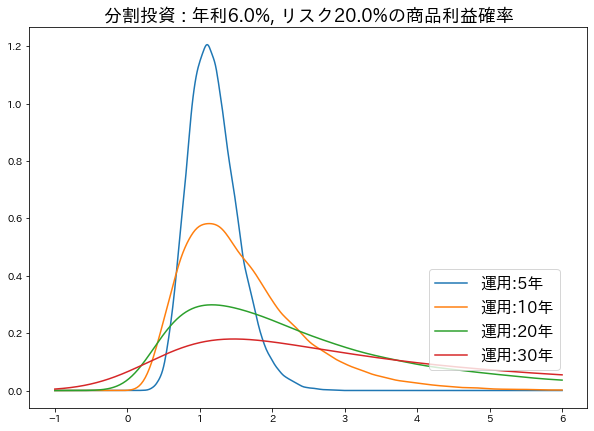

5年後に資産が4.0倍以上になる確率0.0%
10年後に資産が4.0倍以上になる確率1.9%
20年後に資産が4.0倍以上になる確率21.4%
30年後に資産が4.0倍以上になる確率40.6%


5年後に資産が20.0%以上減少している確率11.4%
10年後に資産が20.0%以上減少している確率14.9%
20年後に資産が20.0%以上減少している確率12.7%
30年後に資産が20.0%以上減少している確率9.9%


In [6]:
ams = AssetManagementSimulate(**asset_simulate_dict)
ams.plot_installment_investment_distribution()

## 2.資産運用シミュレーション

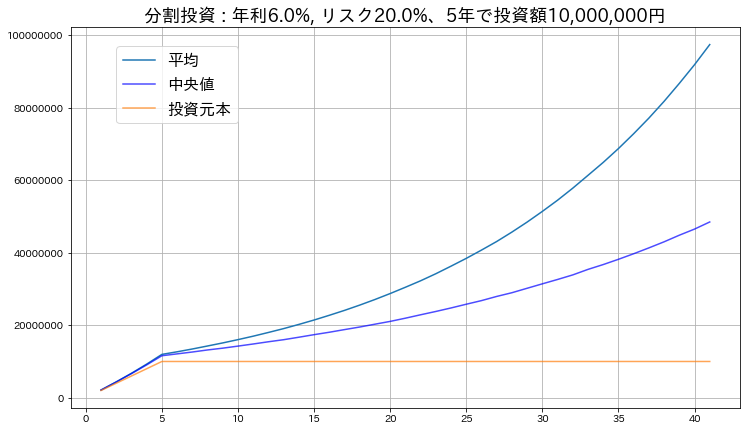

In [7]:
ams.simulate_plot()

## 3.投資ありのシミュレーション

In [8]:
average_profit_list = ams.average_profit_list() #平均的な利益
# median_profit_list = ams.median_profit_list() #中央値な利益
_, age_list, all_life_simulate_list = life_plan_simulate.life_plan_calc()
#投資なしライフプラン * 投資
invest_life_plan_simulation_list = average_profit_list + all_life_simulate_list

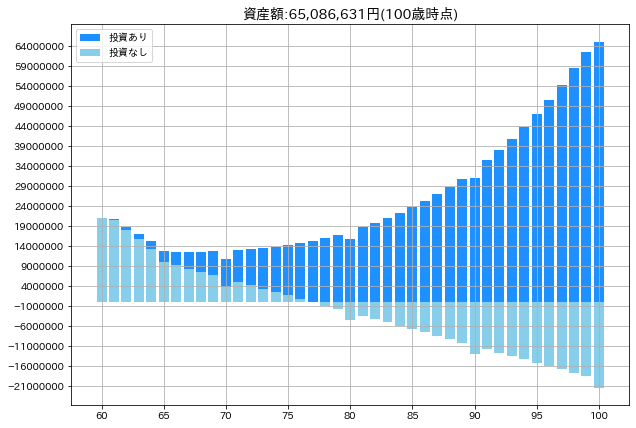

In [9]:
life_plan_simulate.plot_figure_of_life_plan_in_invest(age_list, all_life_simulate_list, invest_life_plan_simulation_list)